In [1]:
import torch
from tfdiff.wifi_model import tfdiff_WiFi
from tfdiff.params import AttrDict, all_params
from tfdiff.diffusion import SignalDiffusion, GaussianDiffusion
from scipy.io import loadmat

params = all_params[0]
device = torch.device('cuda:1')
model_dir = '/home/zuser/project/WQ/RF_Diffusion/RF-Diffusion/model_custom/wifi/6_24_test2'
checkpoint = torch.load(f'{model_dir}/weights.pt')
model = tfdiff_WiFi(AttrDict(params)).to(device)
model.load_state_dict(checkpoint['model'])
model.eval()
model.params.override(params)
model.cuda(device=1)
diffusion = SignalDiffusion(
    params) if params.signal_diffusion else GaussianDiffusion(params)
cond = torch.tensor([[2, 1, 1, 1, 1, 6]], dtype=torch.complex64, device=device)
cond = torch.view_as_real(cond)
data = loadmat('/home/zuser/project/PFL_WIDAR/Widar3.0ReleaseData/csi_mat/user5-1-1-1-1-r1.mat')['cfr']
data = torch.view_as_real(torch.tensor(data)).to('cuda:1')
with torch.no_grad():
    pred = diffusion.native_sampling(model, data, cond, device)

RuntimeError: The size of tensor a (512) must match the size of tensor b (1433) at non-singleton dimension 1

In [ ]:
img = abs(torch.view_as_complex(pred[0].to('cpu')))

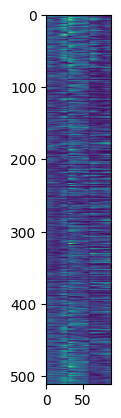

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [2]:
from scipy.io import loadmat

img2 = loadmat('/home/zuser/project/PFL_WIDAR/Widar3.0ReleaseData/csi_mat/user5-1-1-1-1-r1.mat')['cfr']
plt.figure(figsize=(10, 10))
plt.imshow(abs(img2))

NameError: name 'plt' is not defined